In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
!pip install transformers

# Input data files are available in the read-only "../input/" directorypip
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.8 MB/s eta 0:00:00


In [2]:
#Hyperparameters
my_learning_rate = 3E-6 # default is 5E-5
my_adam_epsilon = 1E-8 # default is 1E-8
my_number_of_epochs = 5
my_warmup = 3
my_mini_batch_size = 32

In [3]:
import torch
if torch.cuda.is_available():  
    device = torch.device("cuda")
    print('I will use the GPU:', torch.cuda.get_device_name(0))
    
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

I will use the GPU: Tesla T4


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = pd.read_csv("/content/drive/MyDrive/NLP RES DATASET/labeled_dataHSOLemotion.csv")


In [6]:
dataset[["text","target"]] = dataset[["tweet","emotion"]]

In [7]:
dataset = dataset[["text","target"]] 

In [8]:
dataset.head()

,text,target
0,!!! RT @mayasolovely: As a woman you shouldn't...,0.0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1.0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1.0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0.0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1.0


In [9]:
from sklearn.model_selection import train_test_split

updated_train, updated_test = train_test_split(dataset, test_size=0.2, random_state=25)

print(f"No. of training examples: {updated_train.shape[0]}")
print(f"No. of testing examples: {updated_test.shape[0]}")

No. of training examples: 19826
No. of testing examples: 4957


In [10]:
updated_train.head(20)

,text,target
20694,Sexy ass yellow bone,1.0
5697,@catleesh_ I have small pussy size plugs,1.0
19767,RT @nostalgic_mike: Aw y'all some hoes hating ...,3.0
22656,"When Chief Keef said ""I aint done turning up b...",1.0
9848,Hoes always tryna say they look like a celebri...,3.0
7096,@suchy_monster you make me feel all warm and f...,0.0
22635,What you know about getting money low key .. H...,1.0
21668,Then i fuck yo bitch,1.0
12339,Left a nice little message in his inbox so he ...,1.0
1378,&#8220;@Leelucas_: Yall on my TL need to be sl...,1.0


In [11]:
import re
def preprocess(text):

    text=text.lower()
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'http?:\/\/.*[\r\n]*', '', text)
    #Replace &amp, &lt, &gt with &,<,> respectively
    text=text.replace(r'&amp;?',r'and')
    text=text.replace(r'&lt;',r'<')
    text=text.replace(r'&gt;',r'>')
    #remove hashtag sign
    #text=re.sub(r"#","",text)   
    #remove mentions
    text = re.sub(r"(?:\@)\w+", '', text)
    #text=re.sub(r"@","",text)
    #remove non ascii chars
    text=text.encode("ascii",errors="ignore").decode()
    #remove some puncts (except . ! ?)
    text=re.sub(r'[:"#$%&\*+,-/:;<=>@\\^_`{|}~]+','',text)
    text=re.sub(r'[!]+','!',text)
    text=re.sub(r'[?]+','?',text)
    text=re.sub(r'[.]+','.',text)
    text=re.sub(r"'","",text)
    text=re.sub(r"\(","",text)
    text=re.sub(r"\)","",text)
    
    text=" ".join(text.split())
    return text

updated_train['text'] = updated_train['text'].apply(preprocess)
updated_test['text'] = updated_test['text'].apply(preprocess)
updated_train = updated_train[updated_train["text"]!='']

updated_train.head()

,text,target
20694,sexy ass yellow bone,1.0
5697,i have small pussy size plugs,1.0
19767,rt aw yall some hoes hating on that girl that ...,3.0
22656,when chief keef said i aint done turning up bi...,1.0
9848,hoes always tryna say they look like a celebri...,3.0


In [12]:
updated_train = updated_train[["text","target"]]
updated_train.head()

,text,target
20694,sexy ass yellow bone,1.0
5697,i have small pussy size plugs,1.0
19767,rt aw yall some hoes hating on that girl that ...,3.0
22656,when chief keef said i aint done turning up bi...,1.0
9848,hoes always tryna say they look like a celebri...,3.0


In [13]:
len(updated_train)

19804

In [14]:
updated_train["target"].value_counts()

1.0    11427
0.0     4736
3.0     3434
2.0      207
Name: target, dtype: int64

In [15]:
# Get the lists of texts and labels.
texts = updated_train.text.values
labels = updated_train.target.values

#take a look at the first 50 training examples
for n in range(50):
    print(texts[n], "(LABEL:", labels[n], ")")

sexy ass yellow bone (LABEL: 1.0 )
i have small pussy size plugs (LABEL: 1.0 )
rt aw yall some hoes hating on that girl that looks like a dude 128514128557 (LABEL: 3.0 )
when chief keef said i aint done turning up bitch! (LABEL: 1.0 )
hoes always tryna say they look like a celebrity no bitch! you like the other hoe that love on krenshaw sit yo basic ass down (LABEL: 3.0 )
you make me feel all warm and fuzzy inside 128522 youcansitwithus (LABEL: 0.0 )
what you know about getting money low key hanging with the street niccas fukn wit the ogs (LABEL: 1.0 )
then i fuck yo bitch (LABEL: 1.0 )
left a nice little message in his inbox so he deleted the comment where he called me a bitch 128514 these8230 (LABEL: 1.0 )
8220 yall on my tl need to be sleep yall got school tomorrow8221 bitch i got straight as ion need to go 128514 (LABEL: 1.0 )
the bitch who shot cj is going upstate 128079128079128588128588128591128591 now he can rip 128124 (LABEL: 1.0 )
you a fucking wigger so stfu (LABEL: 3.0 )
82

In [16]:
!pip install -U huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
!ls

drive  sample_data


In [18]:
from transformers import ElectraTokenizer, ElectraForSequenceClassification,AdamW #Huggingface transformer algorithms and pretrain weights.
                #Electra is selected here, its pretraining method is more advanced than BERT's MLM. AdamW is Adam with weight decay correction.
import torch
tokenizer = ElectraTokenizer.from_pretrained('google/electra-base-discriminator') 
model = ElectraForSequenceClassification.from_pretrained('google/electra-base-discriminator',num_labels=4) #let's try out electra's base discriminator
model.cuda()

Some weights of the model checkpoint at google/electra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.d

ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

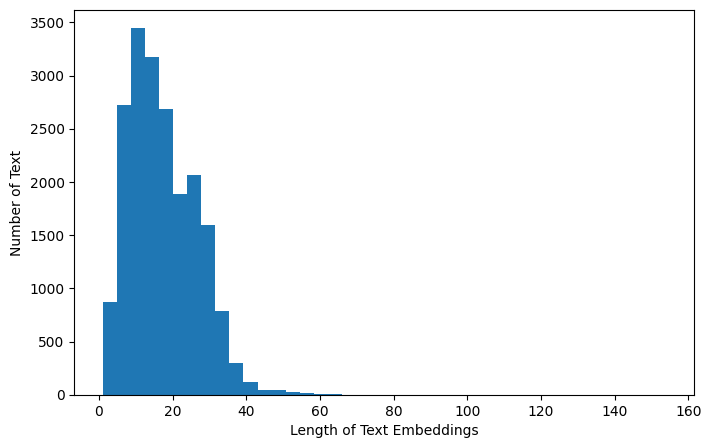

In [19]:
#histogram showing the length of text, text lengths in 40 bins
import matplotlib.pyplot as plt
def plot_sentence_text_length(text_list, tokenizer):
    tokenized_texts = list(map(lambda t: tokenizer.tokenize(t), text_list))
    tokenized_texts_len = list(map(lambda t: len(t), tokenized_texts))
    fig, ax = plt.subplots(figsize=(8, 5));
    ax.hist(tokenized_texts_len, bins=40);
    ax.set_xlabel("Length of Text Embeddings");
    ax.set_ylabel("Number of Text");
    return
plot_sentence_text_length(texts, tokenizer)

In [20]:
indices=tokenizer.batch_encode_plus(texts,
                                    max_length=64,
                                    add_special_tokens=True, 
                                    return_attention_mask=True,
                                    pad_to_max_length=True,
                                    truncation=True)
input_ids=indices["input_ids"]
attention_masks=indices["attention_mask"]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [21]:
from sklearn.model_selection import train_test_split
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=42, test_size=0.2)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=42, test_size=0.2)

In [22]:
# Convert all of our data into torch tensors, the required datatype for our model
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels, dtype=torch.long)
validation_labels = torch.tensor(validation_labels, dtype=torch.long)
train_masks = torch.tensor(train_masks, dtype=torch.long)
validation_masks = torch.tensor(validation_masks, dtype=torch.long)

In [23]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = my_mini_batch_size

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [24]:
optimizer = AdamW(model.parameters(),
                  lr = my_learning_rate, #args.learning_rate
                  eps = my_adam_epsilon  #args.adam_epsilon
                )

from transformers import get_linear_schedule_with_warmup

# Number of training epochs
epochs = my_number_of_epochs

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = my_warmup, 
                                            num_training_steps = total_steps)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [25]:
import numpy as np

#about evalution mert - here we use accuracy, which is good enough because the data is
#is binary classified and distribution is pretty even between positive and negative
#however better evaluation should be use later F1 or AUC ROC because emergency are
#events rare tweets

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [26]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [27]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [28]:
import random

# Base on GLUE from huggingface, this is classification problem best suit our problem, here, look at the
# example Python code from hungingface gtihub, here is the here training loop

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    model.train()

    for step, batch in enumerate(train_dataloader):

        # Progress update every 100 batches.
        if step % 50 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # `batch` contains three pytorch tensors: [0]: input ids ,[1]: attention masks,[2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Clear any previously calculated gradients.
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Evaluate the model on this training batch.
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        loss = outputs[0]

        # Accumulate the training loss over all of the batches 
        #total_loss += loss.item()
        loss.backward()

        # Clip the norm of the gradients to 1.0. to prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(format_time(time.time() - t0)))
      
print("")
print("Training complete!")


======== Epoch 1 / 5 ========
Training...
  Batch    50  of    496.    Elapsed: 0:00:20.
  Batch   100  of    496.    Elapsed: 0:00:36.
  Batch   150  of    496.    Elapsed: 0:00:53.
  Batch   200  of    496.    Elapsed: 0:01:11.
  Batch   250  of    496.    Elapsed: 0:01:29.
  Batch   300  of    496.    Elapsed: 0:01:47.
  Batch   350  of    496.    Elapsed: 0:02:04.
  Batch   400  of    496.    Elapsed: 0:02:21.
  Batch   450  of    496.    Elapsed: 0:02:38.

  Average training loss: 0.00
  Training epoch took: 0:02:54

======== Epoch 2 / 5 ========
Training...
  Batch    50  of    496.    Elapsed: 0:00:17.
  Batch   100  of    496.    Elapsed: 0:00:35.
  Batch   150  of    496.    Elapsed: 0:00:52.
  Batch   200  of    496.    Elapsed: 0:01:09.
  Batch   250  of    496.    Elapsed: 0:01:26.
  Batch   300  of    496.    Elapsed: 0:01:44.
  Batch   350  of    496.    Elapsed: 0:02:01.
  Batch   400  of    496.    Elapsed: 0:02:18.
  Batch   450  of    496.    Elapsed: 0:02:36.

  Ave

In [29]:
# Validation
print("")
print("Running Validation...")

t0 = time.time()
model.eval()

preds=[]
true=[]

# Tracking variables 
eval_loss, eval_accuracy = 0, 0
nb_eval_steps, nb_eval_examples = 0, 0

# Evaluate data for one epoch
for batch in validation_dataloader:
    
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():        

        outputs = model(b_input_ids, 
                        token_type_ids=None, 
                        attention_mask=b_input_mask)
    
    # Get the "logits" output by the model. The "logits" are the output values prior to applying an activation function like the softmax.
    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    preds.append(logits)
    true.append(label_ids)
    # Calculate the accuracy for this batch.
    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    # Accumulate the total accuracy.
    eval_accuracy += tmp_eval_accuracy

    # Track the number of batches
    nb_eval_steps += 1

# Report the final accuracy for this validation run.
print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
print("  Validation took: {:}".format(format_time(time.time() - t0)))


Running Validation...
  Accuracy: 0.76
  Validation took: 0:00:15


In [30]:
# Combine the predictions for each batch into a single list of 0s and 1s.
flat_predictions = [item for sublist in preds for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

# Combine the correct labels for each batch into a single list.
flat_true_labels = [item for sublist in true for item in sublist]

In [31]:
from sklearn.metrics import classification_report
print(classification_report(flat_predictions,flat_true_labels))

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       814
           1       0.88      0.79      0.83      2559
           2       0.00      0.00      0.00         0
           3       0.43      0.49      0.46       588

    accuracy                           0.76      3961
   macro avg       0.51      0.54      0.52      3961
weighted avg       0.79      0.76      0.77      3961



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
text1 = updated_test.text.values

indices1=tokenizer.batch_encode_plus(text1,
                                     max_length=128,
                                     add_special_tokens=True, 
                                     return_attention_mask=True,
                                     pad_to_max_length=True,
                                     truncation=True)
input_ids1=indices1["input_ids"]
attention_masks1=indices1["attention_mask"]

prediction_inputs1= torch.tensor(input_ids1)
prediction_masks1 = torch.tensor(attention_masks1)


# Set the batch size.  
batch_size = my_mini_batch_size

# Create the DataLoader.
prediction_data1 = TensorDataset(prediction_inputs1, prediction_masks1)
prediction_sampler1 = SequentialSampler(prediction_data1)
prediction_dataloader1 = DataLoader(prediction_data1, sampler=prediction_sampler1, batch_size=batch_size)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2354: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [33]:
print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs1)))

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions = []

# Predict 
for batch in prediction_dataloader1:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids1, b_input_mask1 = batch
  
  # Telling the model not to compute or store gradients, saving memory and 
  # speeding up prediction
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs1 = model(b_input_ids1, token_type_ids=None, 
                      attention_mask=b_input_mask1)

  logits1 = outputs1[0]

  # Move logits and labels to CPU
  logits1 = logits1.detach().cpu().numpy()
  
  
  # Store predictions and true labels
  predictions.append(logits1)

flat_predictions = [item for sublist in predictions for item in sublist]
flat_predictions = np.argmax(flat_predictions, axis=1).flatten()

Predicting labels for 4,957 test sentences...


In [34]:
sample_sub=pd.read_csv('../input/nlp-getting-started/sample_submission.csv')
submit=pd.DataFrame({'id':sample_sub['id'].values.tolist(),'target':flat_predictions})
#submit.to_csv('submission.csv',index=False)

FileNotFoundError: ignored

In [ ]:
submit.head()

In [ ]:
df_leak = pd.read_csv('/kaggle/input/disasters-on-social-media/socialmedia-disaster-tweets-DFE.csv', encoding ='ISO-8859-1')[['choose_one', 'text']]

# Creating target and id
df_leak['target'] = (df_leak['choose_one'] == 'Relevant').astype(np.int8)
df_leak['id'] = df_leak.index.astype(np.int16)
df_leak.drop(columns=['choose_one', 'text'], inplace=True)

# Merging target to test set
updated_test = updated_test.merge(df_leak, on=['id'], how='left')

print('Leaked Data Set Shape = {}'.format(df_leak.shape))
print('Leaked Data Set Memory Usage = {:.2f} MB'.format(df_leak.memory_usage().sum() / 1024**2))

perfect_submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
perfect_submission['target'] = updated_test['target'].values
perfect_submission.to_csv('submission.csv',index=False)
perfect_submission.describe()